## Description

In this notebook we are going to explore using [MxNet](http://mxnet.incubator.apache.org/) to build a [Deep Neural Network](https://en.wikipedia.org/wiki/Deep_learning#Deep_neural_networks) for the classification of the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

> The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Apache MXNet (incubating) is a deep learning framework designed for both efficiency and flexibility. It allows you to mix symbolic and imperative programming to maximize efficiency and productivity. At its core, MXNet contains a dynamic dependency scheduler that automatically parallelizes both symbolic and imperative operations on the fly. A graph optimization layer on top of that makes symbolic execution fast and memory efficient. MXNet is portable and lightweight, scaling effectively to multiple GPUs and multiple machines.

## Step by step

Following Machine Learning best practices, the first thing we need to do is downloading the dataset and splitting it into:

* Train dataset
* Test dataset

The train dataset is used to train the model, while the test dataset is used to measure how well the model generalizes to not-previously-see samples.

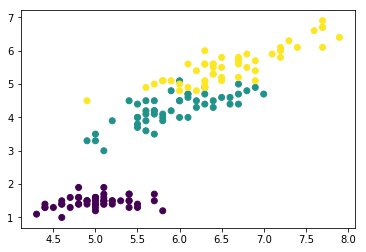

/media/nvidia/development/python2_venv/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

import logging
logging.getLogger().setLevel(logging.INFO)

# Load iris dataset using Pandas
iris_bunch = datasets.load_iris()
X = pd.DataFrame(iris_bunch.data)
y = pd.DataFrame(iris_bunch.target)

# Of course we would like to visualize the results.
import matplotlib.pyplot as plt

# Training dataset
plt.scatter(X[0], X[2], c=y[0])
plt.show()

# Split between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Now that we have loaded our data, we can load MxNet and define the neural network. In this case the network has:

* one hidden layer with 24 neurons and Relu activation function
* one hidden layer with 3 nodes, and no activation function
* one SoftMax output layer. 

The input to the network is the data and the corresponding labels. The hidden layer just above the output layer, reduces the number of components to the number of categories amongst which we are trying to classify.

In [2]:
import mxnet as mx

# Define the input variables
data = mx.sym.Variable("data")
label = mx.sym.Variable("label")

# Define the hiddlen layer
net = mx.sym.FullyConnected(data=data, num_hidden=24)
net = mx.sym.Activation(data=net, act_type='relu')

# Second hidden layer, reduces the number of components to the number
# of categories
net = mx.sym.FullyConnected(net, num_hidden=3)

# Define the output layer. 
net = mx.sym.SoftmaxOutput(data=net, label=label, multi_output=False)

# Combine network into a module, for easy inference. In this case we
# configure the module to run on a GPU. If you don't have a GPU change
# the context to cpu
ctx = mx.context.gpu()
mod = mx.mod.module.Module(symbol=net, data_names=['data'],  
                           label_names=['label'], context=ctx)

Finally we wrap our test/train data in data iterators that MxNet uses to traverse our samples. In this case we are using the test dataset to evaluate the model after each epoch (one epoch is a complete traversal over the train dataset).

In [3]:
batch_size = 5
data_iter = mx.io.NDArrayIter(data=X_train.as_matrix().astype('float64') , 
                              label=y_train.as_matrix().reshape(y_train.shape[0]), 
                              label_name='label', batch_size=batch_size, shuffle=True)
eval_iter = mx.io.NDArrayIter(data=X_test.as_matrix().astype('float64') , 
                              label=y_test.as_matrix().reshape(y_test.shape[0]), 
                              label_name='label', batch_size=batch_size, shuffle=True)
mod.fit(data_iter, eval_data=eval_iter, num_epoch=200)

INFO:root:Epoch[0] Train-accuracy=0.350000
INFO:root:Epoch[0] Time cost=0.075
INFO:root:Epoch[0] Validation-accuracy=0.200000
INFO:root:Epoch[1] Train-accuracy=0.366667
INFO:root:Epoch[1] Time cost=0.071
INFO:root:Epoch[1] Validation-accuracy=0.200000
INFO:root:Epoch[2] Train-accuracy=0.366667
INFO:root:Epoch[2] Time cost=0.070
INFO:root:Epoch[2] Validation-accuracy=0.200000
INFO:root:Epoch[3] Train-accuracy=0.366667
INFO:root:Epoch[3] Time cost=0.054
INFO:root:Epoch[3] Validation-accuracy=0.200000
INFO:root:Epoch[4] Train-accuracy=0.366667
INFO:root:Epoch[4] Time cost=0.059
INFO:root:Epoch[4] Validation-accuracy=0.200000
INFO:root:Epoch[5] Train-accuracy=0.366667
INFO:root:Epoch[5] Time cost=0.064
INFO:root:Epoch[5] Validation-accuracy=0.200000
INFO:root:Epoch[6] Train-accuracy=0.366667
INFO:root:Epoch[6] Time cost=0.065
INFO:root:Epoch[6] Validation-accuracy=0.200000
INFO:root:Epoch[7] Train-accuracy=0.366667
INFO:root:Epoch[7] Time cost=0.054
INFO:root:Epoch[7] Validation-accuracy=0

INFO:root:Epoch[64] Train-accuracy=0.950000
INFO:root:Epoch[64] Time cost=0.063
INFO:root:Epoch[64] Validation-accuracy=1.000000
INFO:root:Epoch[65] Train-accuracy=0.950000
INFO:root:Epoch[65] Time cost=0.059
INFO:root:Epoch[65] Validation-accuracy=1.000000
INFO:root:Epoch[66] Train-accuracy=0.950000
INFO:root:Epoch[66] Time cost=0.061
INFO:root:Epoch[66] Validation-accuracy=1.000000
INFO:root:Epoch[67] Train-accuracy=0.950000
INFO:root:Epoch[67] Time cost=0.058
INFO:root:Epoch[67] Validation-accuracy=1.000000
INFO:root:Epoch[68] Train-accuracy=0.950000
INFO:root:Epoch[68] Time cost=0.059
INFO:root:Epoch[68] Validation-accuracy=1.000000
INFO:root:Epoch[69] Train-accuracy=0.950000
INFO:root:Epoch[69] Time cost=0.062
INFO:root:Epoch[69] Validation-accuracy=1.000000
INFO:root:Epoch[70] Train-accuracy=0.950000
INFO:root:Epoch[70] Time cost=0.063
INFO:root:Epoch[70] Validation-accuracy=1.000000
INFO:root:Epoch[71] Train-accuracy=0.950000
INFO:root:Epoch[71] Time cost=0.065
INFO:root:Epoch[7

INFO:root:Epoch[127] Train-accuracy=0.966667
INFO:root:Epoch[127] Time cost=0.051
INFO:root:Epoch[127] Validation-accuracy=0.966667
INFO:root:Epoch[128] Train-accuracy=0.966667
INFO:root:Epoch[128] Time cost=0.048
INFO:root:Epoch[128] Validation-accuracy=0.966667
INFO:root:Epoch[129] Train-accuracy=0.966667
INFO:root:Epoch[129] Time cost=0.046
INFO:root:Epoch[129] Validation-accuracy=0.966667
INFO:root:Epoch[130] Train-accuracy=0.966667
INFO:root:Epoch[130] Time cost=0.046
INFO:root:Epoch[130] Validation-accuracy=0.966667
INFO:root:Epoch[131] Train-accuracy=0.966667
INFO:root:Epoch[131] Time cost=0.047
INFO:root:Epoch[131] Validation-accuracy=0.966667
INFO:root:Epoch[132] Train-accuracy=0.966667
INFO:root:Epoch[132] Time cost=0.046
INFO:root:Epoch[132] Validation-accuracy=0.966667
INFO:root:Epoch[133] Train-accuracy=0.966667
INFO:root:Epoch[133] Time cost=0.050
INFO:root:Epoch[133] Validation-accuracy=0.966667
INFO:root:Epoch[134] Train-accuracy=0.966667
INFO:root:Epoch[134] Time cost=

INFO:root:Epoch[189] Time cost=0.057
INFO:root:Epoch[189] Validation-accuracy=0.966667
INFO:root:Epoch[190] Train-accuracy=0.966667
INFO:root:Epoch[190] Time cost=0.057
INFO:root:Epoch[190] Validation-accuracy=0.966667
INFO:root:Epoch[191] Train-accuracy=0.966667
INFO:root:Epoch[191] Time cost=0.059
INFO:root:Epoch[191] Validation-accuracy=0.966667
INFO:root:Epoch[192] Train-accuracy=0.966667
INFO:root:Epoch[192] Time cost=0.049
INFO:root:Epoch[192] Validation-accuracy=0.966667
INFO:root:Epoch[193] Train-accuracy=0.966667
INFO:root:Epoch[193] Time cost=0.047
INFO:root:Epoch[193] Validation-accuracy=0.966667
INFO:root:Epoch[194] Train-accuracy=0.966667
INFO:root:Epoch[194] Time cost=0.050
INFO:root:Epoch[194] Validation-accuracy=0.966667
INFO:root:Epoch[195] Train-accuracy=0.966667
INFO:root:Epoch[195] Time cost=0.048
INFO:root:Epoch[195] Validation-accuracy=0.966667
INFO:root:Epoch[196] Train-accuracy=0.966667
INFO:root:Epoch[196] Time cost=0.055
INFO:root:Epoch[196] Validation-accurac

Finally, we execute a prediction run agains the train dataset, and compare the labels obtained with the ground truth. Note that Sofmax returns the probability for each label, so here we consider the label with the highest probability as the prediced.

In [4]:
import numpy as np
data_iter = mx.io.NDArrayIter(data=X_test.as_matrix().astype('float64') , 
                              label=y_test.as_matrix().reshape(y_test.shape[0]), 
                              label_name='label', batch_size = 20, shuffle=False)
pred = mod.predict(data_iter)
predicted_category = np.argmax(pred.asnumpy(), axis=1)

correct_pred = (y_test.as_matrix().reshape(y_test.shape[0]) == predicted_category)
display(correct_pred.sum(), " correctly predicted, out of ", y_test.shape[0])

29

' correctly predicted, out of '

30